In [2]:
import numpy as np          # fundamental package for scientific computing
import glob                 # return all file paths that match a specific pattern
import matplotlib.pyplot as plt
import os                   # provide operating system-related functions

# Combine single time series into one array

In [16]:
result_arrays = glob.glob('timeseries/*.npy')
time = np.arange(1850,1850+3012/12,1/12)

In [17]:
result_arrays

['timeseries/OSNAPwest_time_series.npy',
 'timeseries/bsf_min_time_series.npy',
 'timeseries/spgy_dept_time_series.npy',
 'timeseries/rapi_dens_time_series.npy',
 'timeseries/maxi_dept_time_series.npy',
 'timeseries/maxi_dens_time_series.npy',
 'timeseries/OSNAPeast_time_series.npy',
 'timeseries/spgy_dens_time_series.npy',
 'timeseries/rapi_dept_time_series.npy']

In [20]:
for array in result_arrays:
    # Load array
    result = np.load(array)
    # Add each single time series to array
    for i in range(81):
        file = 'timeseries/save_parts/'+array[11:][:-4]+'_'+str(i)+'.npy'
        if os.path.exists(file):
            time_series = np.load(file)
            result[:, i] = time_series
    
    # Check for 'dept' or 'dens' in the filename and apply scaling factor
    if 'dept' in array:
        result *= 1e-6
    elif 'dens' in array:
        result *= 1e-12
    
    result = np.where((result[1, :] > -5) & (result[1, :] < 5), np.nan, result)
    
    np.save(array, result)

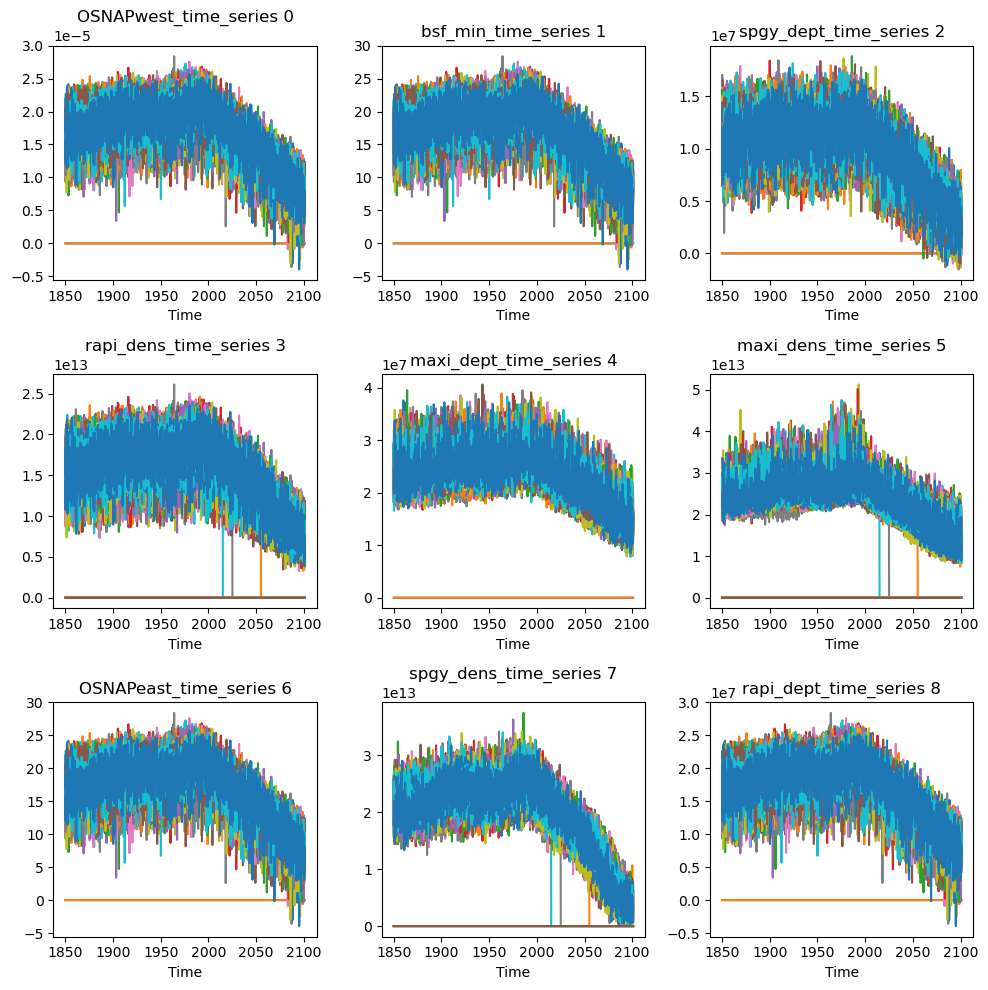

In [21]:
# Create a figure with nine subplots
fig, axs = plt.subplots(3, 3, figsize=(10, 10))
# Loop through the file paths and plot each file in a subplot
for i, file_path in enumerate(result_arrays):
    row = i // 3
    col = i % 3
    result = np.load(file_path)
    axs[row, col].plot(time, result)
    axs[row, col].set_title(file_path[11:][:-4]+' '+str(i))  # You can set titles for each subplot
    axs[row, col].set_xlabel('Time')
# Adjust layout to prevent overlap
plt.tight_layout()
# Show the plot
plt.show()

# Adjust units
those were not computed within the computation process to reduce computational cost
(yes I could also have included these lines in the code)

In [51]:
result = np.load(result_arrays[2])
data = result * 1e-6
np.save(result_arrays[2], data)

In [52]:
result = np.load(result_arrays[3])
data = result * 1e-12
np.save(result_arrays[3], data)

In [53]:
result = np.load(result_arrays[4])
data = result * 1e-6
np.save(result_arrays[4], data)

In [54]:
result = np.load(result_arrays[5])
data = result * 1e-12
np.save(result_arrays[5], data)

In [55]:
result = np.load(result_arrays[7])
data = result * 1e-12
np.save(result_arrays[7], data)

In [56]:
result = np.load(result_arrays[8])
data = result * 1e-6
np.save(result_arrays[8], data)

In [57]:
for array in result_arrays:
    result = np.where((result[1, :] > -5) & (result[1, :] < 5), np.nan, result)
    np.save(array, result)

# Check final result

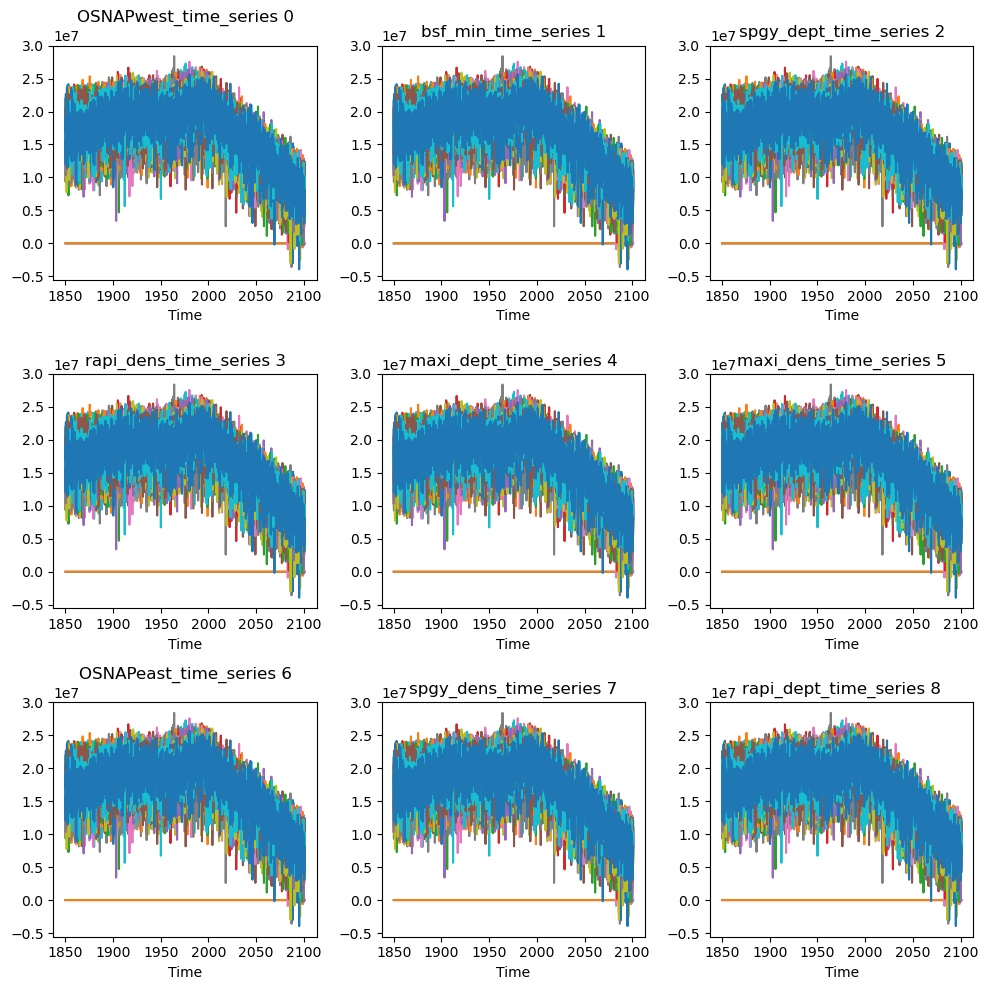

In [58]:
# Create a figure with nine subplots
fig, axs = plt.subplots(3, 3, figsize=(10, 10))
# Loop through the file paths and plot each file in a subplot
for i, file_path in enumerate(result_arrays):
    row = i // 3
    col = i % 3
    result = np.load(file_path)
    axs[row, col].plot(time, result)
    axs[row, col].set_title(file_path[11:][:-4]+' '+str(i))  # You can set titles for each subplot
    axs[row, col].set_xlabel('Time')
# Adjust layout to prevent overlap
plt.tight_layout()
# Show the plot
plt.show()

# Create list for order of memebers in vvel --> find member names 
## same for bsf below

In [24]:
import pandas as pd

In [10]:
df = pd.read_csv('/Data/gfi/share/ModData/CESM2_LENS2/ocean/monthly/log.txt', sep=" ", header=None)
df.columns = ['file_names']
df.insert(0, 'rank', range(0, len(df)))

In [15]:
df = df.sort_values(by=['file_names'])

In [17]:
df

,rank,file_names
6,6,vvel_1001.001.nc
1,1,vvel_1231.001.nc
47,47,vvel_1231.002.nc
58,58,vvel_1231.003.nc
18,18,vvel_1231.004.nc
...,...,...
55,55,vvel_1301.016.nc
51,51,vvel_1301.017.nc
54,54,vvel_1301.018.nc
0,0,vvel_1301.019.nc


In [19]:
df.to_csv('timeseries/order.txt', header=None, index=False, sep=' ')

In [22]:
## bsf

In [26]:
df = pd.read_csv('/Data/gfi/share/ModData/CESM2_LENS2/ocean/monthly/log_bsf.txt', sep=" ", header=None)
df.columns = ['file_names']
df.insert(0, 'rank', range(0, len(df)))
df = df.sort_values(by=['file_names'])
df.to_csv('timeseries/order_bsf.txt', header=None, index=False, sep=' ')